## Importing the datasets from kaggle
<pre>
Create New API Token

1) ! pip install -q kaggle
2)  from google.colab import files
    files.upload()
3) ! mkdir ~/.kaggle
   ! cp kaggle.json ~/.kaggle/
4) ! chmod 600 ~/.kaggle/kaggle.json
5) ! kaggle datasets list
=> Download Data
! kaggle competitions download -c 'name-of-competition'

Use unzip command to unzip the data:
! mkdir train
! unzip train.zip -d train
<pre>

In [ ]:
pwd

'/content'

In [1]:
cd "drive/MyDrive/Colab Notebooks/Data Visualization /Liver Patient Analysis"

/content/drive/MyDrive/Colab Notebooks/Data Visualization /Liver Patient Analysis


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashok4kaggle","key":"f049d806dfbb05767d03d95acde380ef"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           2917  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-23 07:57:52           1616  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            312  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            188  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

In [ ]:
! kaggle datasets download -d uciml/indian-liver-patient-records

  0% 0.00/7.68k [00:00<?, ?B/s]
100% 7.68k/7.68k [00:00<00:00, 1.06MB/s]


In [ ]:
! mkdir train
! unzip indian-liver-patient-records.zip -d train

Archive:  indian-liver-patient-records.zip
  inflating: train/indian_liver_patient.csv  


## Importing the Relevant Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing data

<pre>
Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

1. <b>Age of the patient</b>
2. <b>Gender of the patient</b>
3. <b>Total Bilirubin</b>
4. <b>Direct Bilirubin</b>
5. <b>Alkaline Phosphotase</b>
6. <b>Alamine Aminotransferase</b>
7. <b>Aspartate Aminotransferase</b>
8. <b>Total Protiens</b>
9. <b>Albumin</b>
10.<b>Albumin and Globulin Ratio</b>
11. <b>Dataset</b>: field used to split the data into two sets (patient with liver disease, or no disease)
<pre>

In [3]:
data = pd.read_csv('train/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Checking for Null Values

In [4]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Looks for column containing the Null Values

In [5]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Looks for Correct metrics to replace the Null value

In [6]:
data['Albumin_and_Globulin_Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

Replace Null value by Median as medium are consider best for 

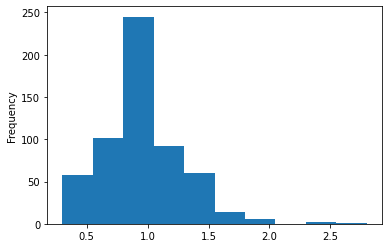

In [7]:
data['Albumin_and_Globulin_Ratio'].plot.hist()

Here data are normally distrubuted but sightly right skewed.So, we can can go with Mean or Mediam. Here i am going with median.

In [8]:
data['Albumin_and_Globulin_Ratio'].median()

0.93

In [9]:
#Creating checkpoint
df = data.copy()

In [10]:
df['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### Looking for data description

In [12]:
df.describe(percentiles=[0.3,.5,.8]).round(2)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00,583.00
mean,44.75,3.30,1.49,290.58,80.71,109.91,6.48,3.14,0.95,1.29
std,16.19,6.21,2.81,242.94,182.62,288.92,1.09,0.80,0.32,0.45
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30,1.00
30%,35.00,0.80,0.20,182.00,25.00,28.00,6.00,2.70,0.80,1.00
50%,45.00,1.00,0.30,208.00,35.00,42.00,6.60,3.10,0.93,1.00
80%,60.00,3.30,1.60,323.60,74.00,104.60,7.30,3.90,1.20,2.00
max,90.00,75.00,19.70,2110.00,2000.00,4929.00,9.60,5.50,2.80,2.00


In [13]:
print(f'Total number of Rows {df.shape[0]}\nTotal number of Columns {df.shape[1]}')

Total number of Rows 583
Total number of Columns 11


Looking the relation between features

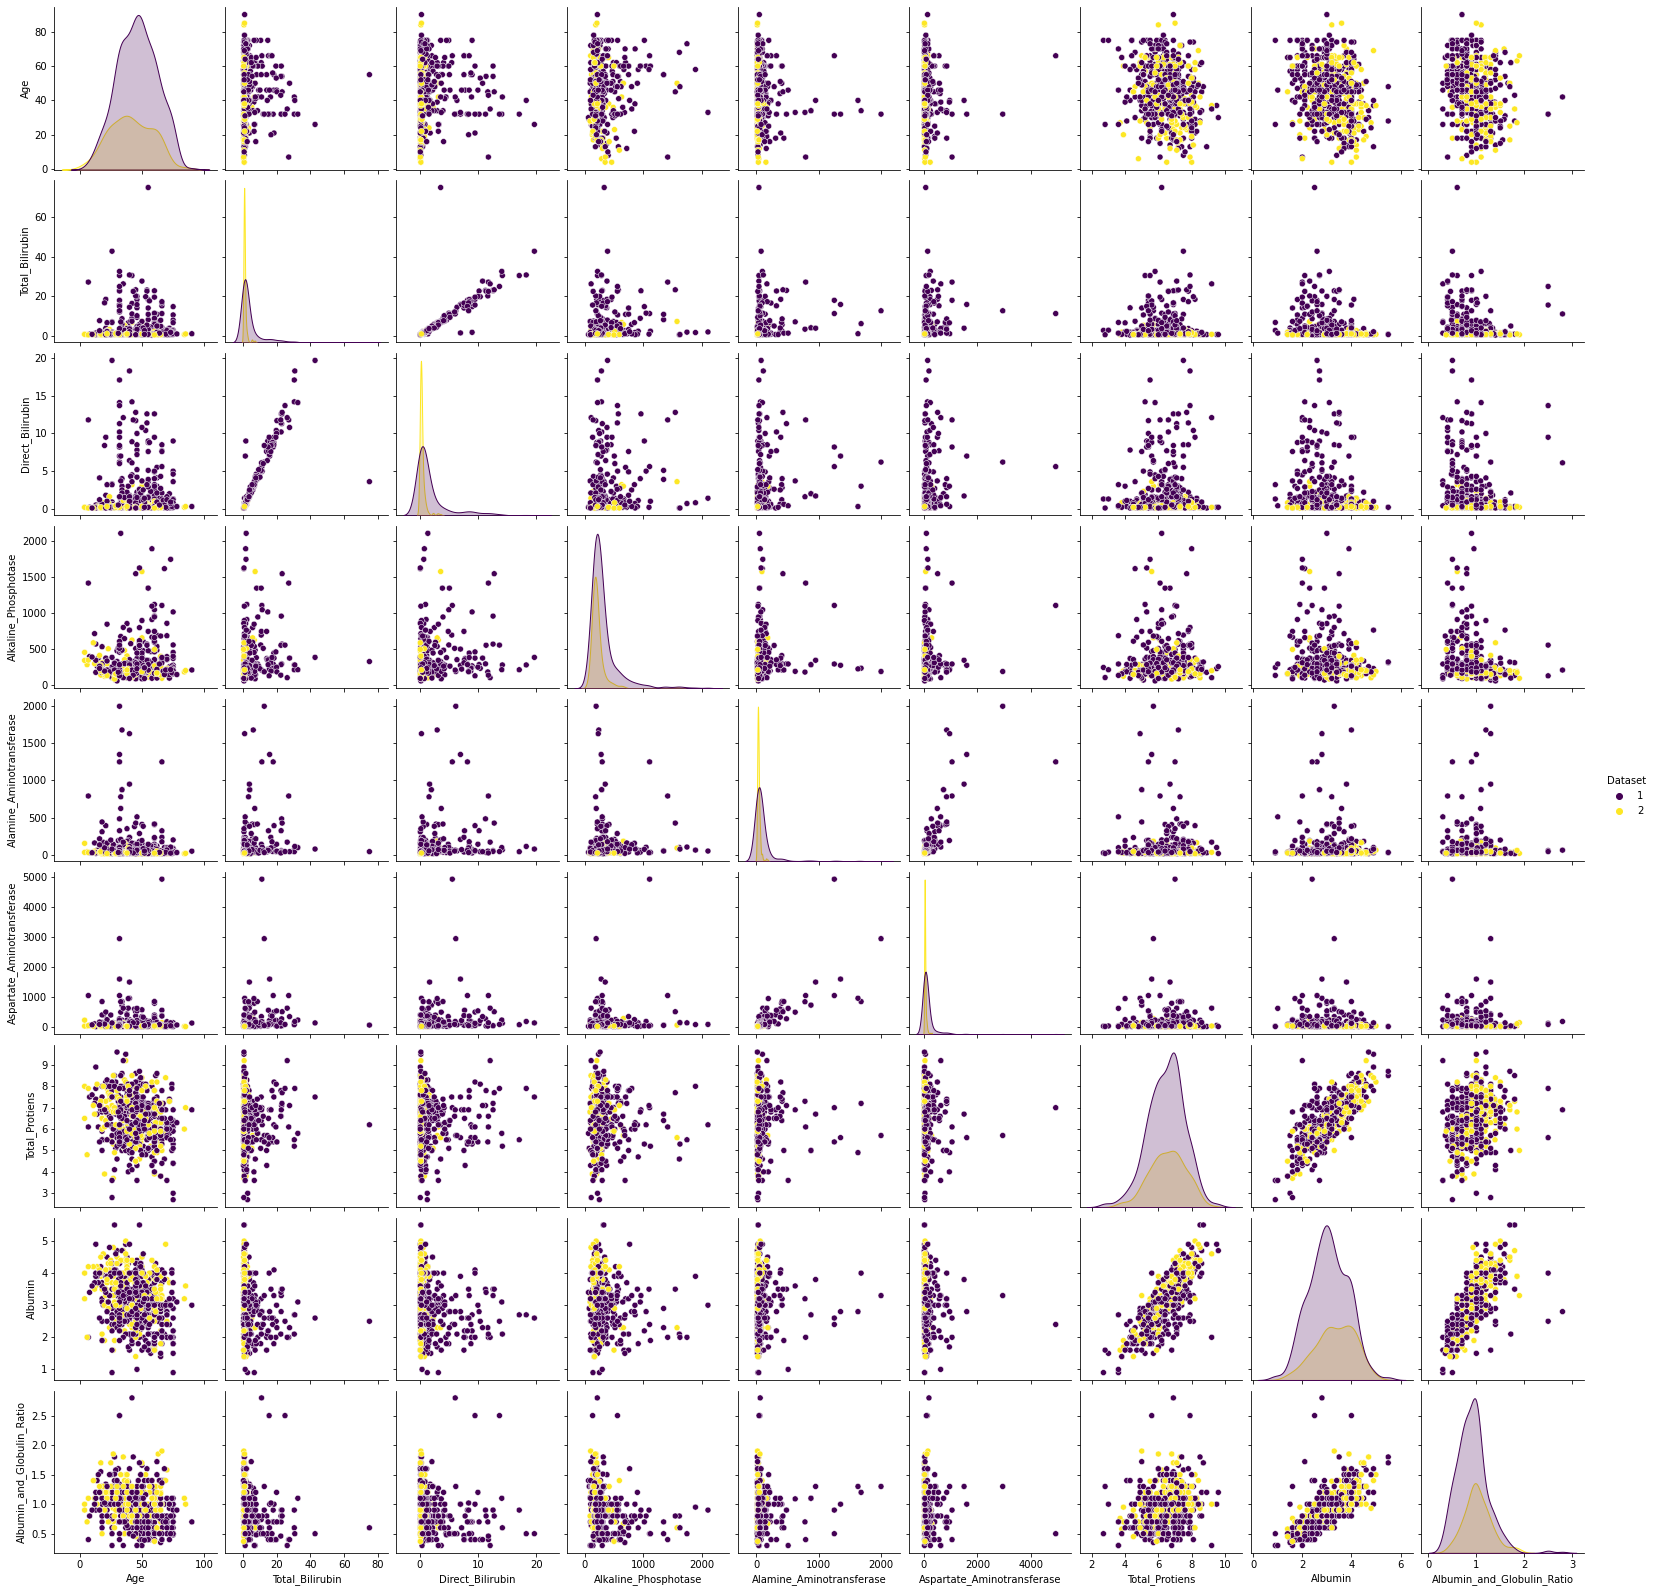

In [14]:
sns.pairplot(df, hue='Dataset', palette='viridis')

#### Looking into univairate features

##### Lets look for Total Bilirubin and Direct Bilirubin

* Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults and usually 1 mg/dL for those under 18.
* Normal results for direct bilirubin are generally 0.3 mg/dL.

/*https://www.mayoclinic.org/tests-procedures/bilirubin/about/pac-20393041#:~:text=Normal%20results%20for%20a%20total,are%20generally%200.3%20mg%2FdL.*/


Text(0, 0.5, 'Total Bilirubin')

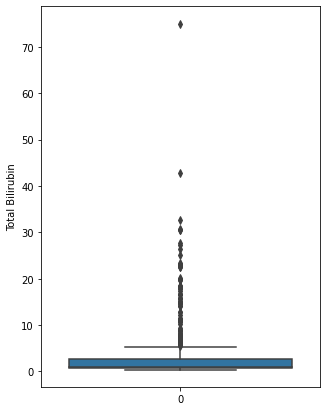

In [15]:
fig = plt.figure(figsize=(5,7))
ax = sns.boxplot(data = df['Total_Bilirubin'],orient='v')
ax.set_ylabel("Total Bilirubin")

Here we could see that the datasets contains huge outliers as Normal Total Bilirubin must contains data around 1.2 but here data shows max upto 75, which is total false and huge outliers

Text(0, 0.5, 'Direct Bilirubin')

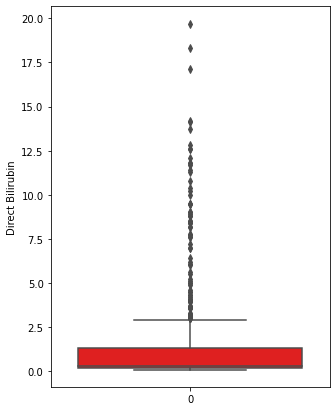

In [16]:
fig = plt.figure(figsize=(5,7))
ax = sns.boxplot(data = df['Direct_Bilirubin'],color='Red',orient='v')
ax.set_ylabel("Direct Bilirubin")

Here also we could see that the datasets contains huge outliers as Normal Direct Bilirubin must contains data around 0.3 but here data shows max upto 20, which are False  or huge outliers.

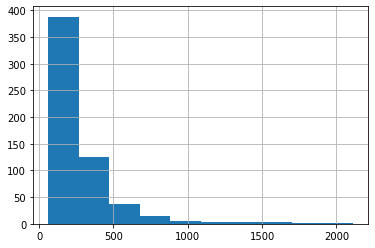

In [17]:
df['Alkaline_Phosphotase'].hist()

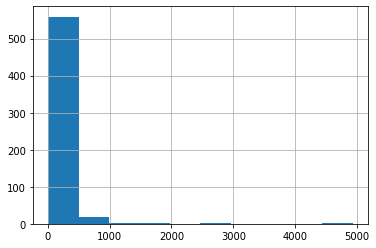

In [18]:
df['Aspartate_Aminotransferase'].hist()

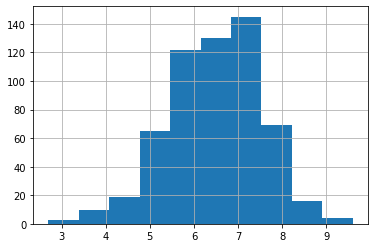

In [19]:
df['Total_Protiens'].hist()

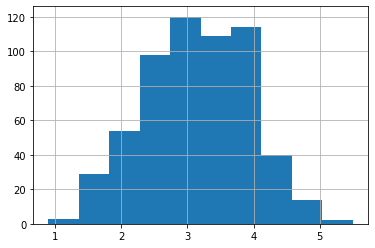

In [20]:
df['Albumin'].hist()

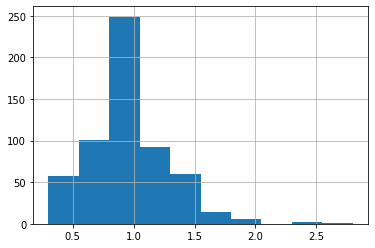

In [21]:
df['Albumin_and_Globulin_Ratio'].hist()

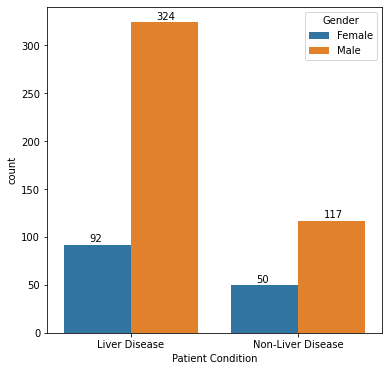

In [22]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = df['Dataset'].apply(lambda x:'Liver Disease' if x == 1 else 'Non-Liver Disease'), hue=df['Gender'])
ax.set_xlabel('Patient Condition')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+0.15, p.get_height()+3))

Lets see by Age Category in datset

In [23]:
pd.Series(map(lambda x: 'Old_Age' if x>=90 else 'Adult_Age' if x > 21 else "Young_Age",df['Age'])).value_counts(normalize=True)

Adult_Age    0.915952
Young_Age    0.082333
Old_Age      0.001715
dtype: float64

* 91.5% of data are from 21-89 Age.
* 8% of data are from below 22 Age.
* 0.1% of data are from above 89 Age

In [24]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Text(0, 0.5, 'Total_Proteins')

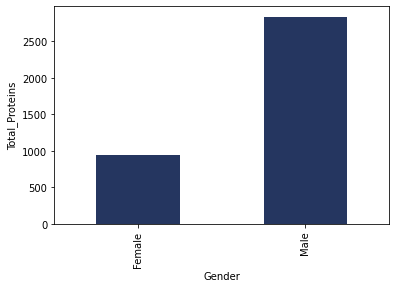

In [25]:
df.groupby('Gender').sum()['Total_Protiens'].plot.bar(color='#253660').set_ylabel('Total_Proteins')

Male consuming more protients then Female. 

In [26]:
#Creating Checkpoint
df2 = df.copy()

In [27]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Lets Encode the nominal features 

In [28]:
df2 = pd.get_dummies(data=df2,columns=['Gender','Dataset'], drop_first=True)

In [29]:
df2.rename(columns={'Dataset_2':'Have_Disease'},inplace=True)

In [30]:
df2 = df2[['Gender_Male', 'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Have_Disease']]

In [31]:
df2.head()

,Gender_Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Have_Disease
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0


Looking for Correlation between features

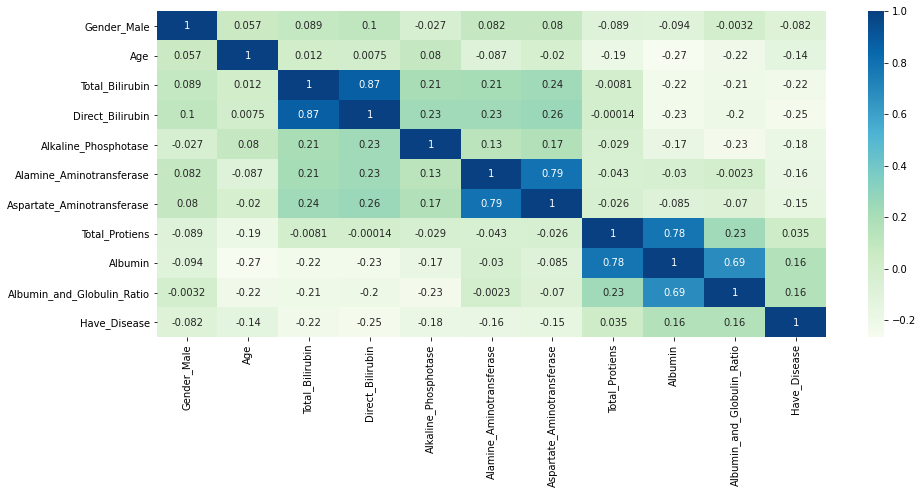

In [32]:
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(),cmap='GnBu',annot=True)

Here we can conclude that,
* Total_Bilirubin and Direct_Bilirubin are highly colorelated also, Alamine_Aminotransferase and Aspartate_Aminotransferase and Total_Protiens and Albumin.
* We can delete one features to increase the model training speed and accuracy
*But this not always true.For reference look into this
<a>https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features</a>

In [33]:
#Creating the check point after removing the correlated data
df3 = df2.drop(['Direct_Bilirubin','Aspartate_Aminotransferase','Albumin'], axis=1)

In [34]:
df3['Have_Disease'].value_counts()

0    416
1    167
Name: Have_Disease, dtype: int64

### Here datasets conatins unbalanced Classes so we will try to resample our data to reduce the incorrectness.

In [35]:
df3.describe(percentiles=[0.30,0.60,0.90])

,Gender_Male,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Have_Disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.756432,44.746141,3.298799,290.576329,80.713551,6.483190,0.946947,0.286449
std,0.429603,16.189833,6.209522,242.937989,182.620356,1.085451,0.318495,0.452490
min,0.000000,4.000000,0.400000,63.000000,10.000000,2.700000,0.300000,0.000000
30%,1.000000,35.000000,0.800000,182.000000,25.000000,6.000000,0.800000,0.000000
50%,1.000000,45.000000,1.000000,208.000000,35.000000,6.600000,0.930000,0.000000
60%,1.000000,49.000000,1.400000,236.000000,42.200000,6.900000,1.000000,0.000000
90%,1.000000,66.000000,7.860000,511.400000,140.000000,7.900000,1.300000,1.000000
max,1.000000,90.000000,75.000000,2110.000000,2000.000000,9.600000,2.800000,1.000000


### Scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#checkpoint
df4 = pd.concat([df3['Gender_Male'],pd.DataFrame(sc.fit_transform(df3.iloc[:,1:7])),df3['Have_Disease']], axis=1)
df4.columns = df3.columns

In [37]:
df4.head()

,Gender_Male,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Have_Disease
0,0,1.252098,-0.418878,-0.426715,-0.354665,0.292120,-0.147529,0
1,1,1.066637,1.225171,1.682629,-0.091599,0.937566,-0.650323,0
2,1,1.066637,0.644919,0.821588,-0.113522,0.476533,-0.178953,0
3,1,0.819356,-0.370523,-0.447314,-0.365626,0.292120,0.166718,0
4,1,1.684839,0.096902,-0.393756,-0.294379,0.753153,-1.718760,0


### Buliding our model using sklearn

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

We will look for metrics

In [39]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg"/>&nbsp;&nbsp;&nbsp;&nbsp;


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Equation_Accuracy.png"/>&nbsp;&nbsp;&nbsp;&nbsp;
* Accuracy is defined as the ratio of correctly predicted examples by the total examples.
* Remember, accuracy is a very useful metric when all the classes are equally important. But this might not be the case if we are predicting if a patient has Liver Cancer. In this example, we can probably tolerate FPs but not FNs.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Confusion-matrix_Precision.png"/>&nbsp;&nbsp;&nbsp;&nbsp;
* Precision tells us how many of the correctly predicted cases actually turned out to be positive.
* Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.
* Precision is important in music or video recommendation systems, e-commerce websites, etc. Wrong results could lead to customer churn and be harmful to the business.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Confusion-matrix_Recall.png"/>&nbsp;&nbsp;&nbsp;&nbsp;
* Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
* Recall is a useful metric in cases where False Negative trumps False Positive.
* Recall is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

So,here we will try to focus on recall score value.

In [40]:
def ml_algorthims(data):
    fig, axes = plt.subplots(3,2, figsize=(10,10))
    print("::::::::::::::::::: Splitting the dataset into train and test ::::::::::")
    x = data.drop('Have_Disease',axis=1).values
    y = data.iloc[:,-1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print(f"X_Train : {x_train.shape}\t X_Test : {x_test.shape}\nY_Train : {y_train.shape}\t Y_Test : {y_test.shape}\n")
    print()
    print(" :::::::::::::::Logistic Regression::::::::::::: ")
    lg = LogisticRegression().fit(x_train,y_train)
    lg_pred = lg.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,lg_pred),annot=True, ax=axes[0,0])
    ax.set_title("Logistic Confusion Matrix")
    # print(classification_report(lg_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,lg_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,lg_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,lg_pred):0.2f}')
    print()
    print(" :::::::::::::::Decision Tree Classifier::::::::::::: ")
    dtree = DecisionTreeClassifier().fit(x_train,y_train)
    dtree_pred = dtree.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True, ax=axes[0,1])
    ax.set_title("Decision Tree Confusion Matrix")
    # print(classification_report(dtree_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,dtree_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,dtree_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,dtree_pred):0.2f}')
    print()
    print(" :::::::::::::::Random Forest Classifier::::::::::::: ")
    rftree = RandomForestClassifier().fit(x_train,y_train)
    rftree_pred = rftree.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,rftree_pred),annot=True, ax=axes[1,0])
    ax.set_title("Random Forest Confusion Matrix")
    # print(classification_report(rftree_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,rftree_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,rftree_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,rftree_pred):0.2f}')
    print()
    print(" :::::::::::::::Xgboost::::::::::::: ")
    xgb_model = XGBClassifier().fit(x_train,y_train)
    xgb_model_pred = xgb_model.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,xgb_model_pred),annot=True, ax=axes[1,1])
    ax.set_title("Xgb Confusion Matrix")
    # print(classification_report(xgb_model_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,xgb_model_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,xgb_model_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,xgb_model_pred):0.2f}')
    print()
    print(" :::::::::::::::K Nearest Neighbour::::::::::::: ")
    knn = KNeighborsClassifier().fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True, ax=axes[2,0])
    ax.set_title("KNN Confusion Matrix")
    # print(classification_report(knn_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,knn_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,knn_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,knn_pred):0.2f}')
    print()
    print(" :::::::::::::::Support Vector Machine (SVM)::::::::::::: ")
    svm = SVC().fit(x_train,y_train)
    svm_pred = svm.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True, ax=axes[2,1])
    ax.set_title("SVM Confusion Matrix")
    # print(classification_report(svm_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,svm_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,svm_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,svm_pred):0.2f}')

### Unbalanced Dataset

Looking for model accuracy when model is treated with unbalanced dataset

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (466, 7)	 X_Test : (117, 7)
Y_Train : (466,)	 Y_Test : (117,)


 :::::::::::::::Logistic Regression::::::::::::: 
Accuracy : 0.76
Precision : 0.62
Recall : 0.17

 :::::::::::::::Decision Tree Classifier::::::::::::: 
Accuracy : 0.64
Precision : 0.34
Recall : 0.43

 :::::::::::::::Random Forest Classifier::::::::::::: 
Accuracy : 0.79
Precision : 0.62
Recall : 0.50

 :::::::::::::::Xgboost::::::::::::: 
Accuracy : 0.79
Precision : 0.63
Recall : 0.40

 :::::::::::::::K Nearest Neighbour::::::::::::: 
Accuracy : 0.74
Precision : 0.48
Recall : 0.43

 :::::::::::::::Support Vector Machine (SVM)::::::::::::: 
Accuracy : 0.74
Precision : 0.00
Recall : 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


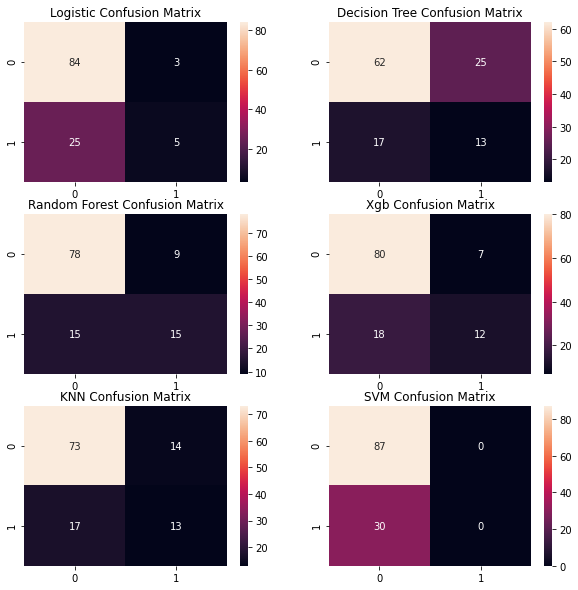

In [41]:
ml_algorthims(df4)

### Balancing the imbalanced Dataset

#### 1. Undersampling the majority class

In [42]:
df_class_0 = df4[df4['Have_Disease'] == 0].copy()
df_class_1 = df4[df4['Have_Disease'] == 1].copy()

In [43]:
undersample = df_class_0.sample(df_class_1.shape[0]).reset_index(drop=True)

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (267, 7)	 X_Test : (67, 7)
Y_Train : (267,)	 Y_Test : (67,)


 :::::::::::::::Logistic Regression::::::::::::: 
Accuracy : 0.67
Precision : 0.65
Recall : 0.73

 :::::::::::::::Decision Tree Classifier::::::::::::: 
Accuracy : 0.61
Precision : 0.65
Recall : 0.45

 :::::::::::::::Random Forest Classifier::::::::::::: 
Accuracy : 0.58
Precision : 0.61
Recall : 0.42

 :::::::::::::::Xgboost::::::::::::: 
Accuracy : 0.63
Precision : 0.67
Recall : 0.48

 :::::::::::::::K Nearest Neighbour::::::::::::: 
Accuracy : 0.57
Precision : 0.55
Recall : 0.64

 :::::::::::::::Support Vector Machine (SVM)::::::::::::: 
Accuracy : 0.67
Precision : 0.63
Recall : 0.79


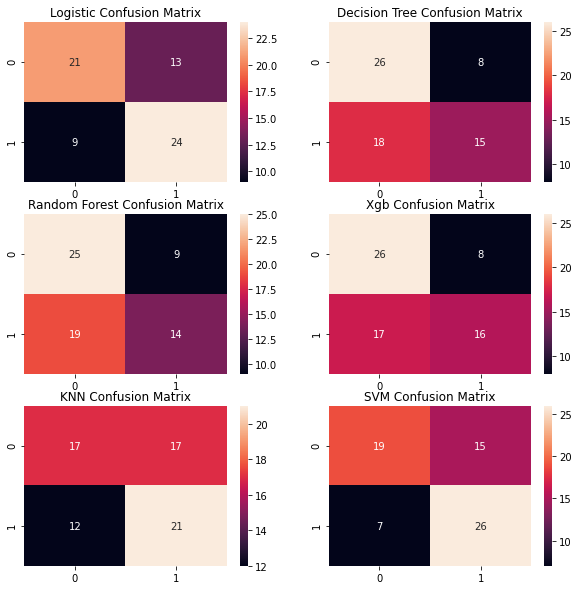

In [44]:
ml_algorthims(pd.concat([undersample,df_class_1],axis=0))

####2. Oversampling minority class

In [45]:
oversample = df_class_1.sample(df_class_0.shape[0], replace=True)

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (665, 7)	 X_Test : (167, 7)
Y_Train : (665,)	 Y_Test : (167,)


 :::::::::::::::Logistic Regression::::::::::::: 
Accuracy : 0.69
Precision : 0.61
Recall : 0.83

 :::::::::::::::Decision Tree Classifier::::::::::::: 
Accuracy : 0.89
Precision : 0.80
Recall : 0.99

 :::::::::::::::Random Forest Classifier::::::::::::: 
Accuracy : 0.90
Precision : 0.82
Recall : 0.99

 :::::::::::::::Xgboost::::::::::::: 
Accuracy : 0.85
Precision : 0.76
Recall : 0.97

 :::::::::::::::K Nearest Neighbour::::::::::::: 
Accuracy : 0.72
Precision : 0.63
Recall : 0.91

 :::::::::::::::Support Vector Machine (SVM)::::::::::::: 
Accuracy : 0.74
Precision : 0.64
Recall : 0.95


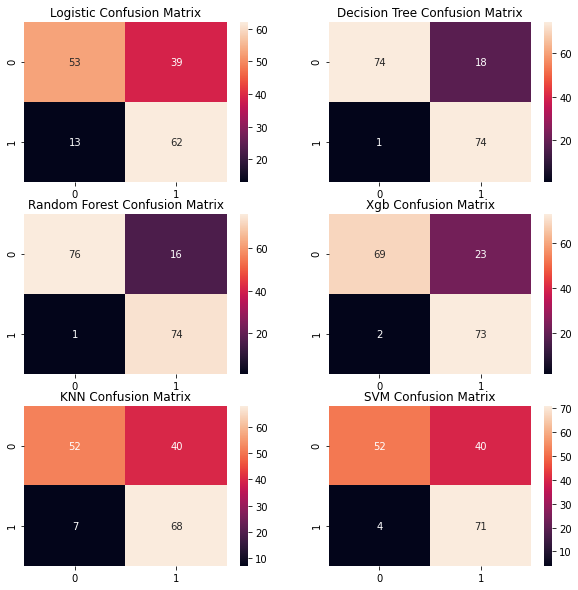

In [46]:
ml_algorthims(pd.concat([oversample,df_class_0],axis=0))

####3. SMOTE(Synthetic Minority Oversampling Techinque)

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_sample(df4.drop('Have_Disease',axis=1),df4['Have_Disease'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
nd = pd.concat([pd.DataFrame(x_sm),pd.DataFrame(y_sm)],axis=1)
nd.columns = df4.columns

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (665, 7)	 X_Test : (167, 7)
Y_Train : (665,)	 Y_Test : (167,)


 :::::::::::::::Logistic Regression::::::::::::: 
Accuracy : 0.74
Precision : 0.71
Recall : 0.87

 :::::::::::::::Decision Tree Classifier::::::::::::: 
Accuracy : 0.72
Precision : 0.75
Recall : 0.73

 :::::::::::::::Random Forest Classifier::::::::::::: 
Accuracy : 0.86
Precision : 0.87
Recall : 0.88

 :::::::::::::::Xgboost::::::::::::: 
Accuracy : 0.79
Precision : 0.81
Recall : 0.80

 :::::::::::::::K Nearest Neighbour::::::::::::: 
Accuracy : 0.78
Precision : 0.75
Recall : 0.91

 :::::::::::::::Support Vector Machine (SVM)::::::::::::: 
Accuracy : 0.75
Precision : 0.71
Recall : 0.91


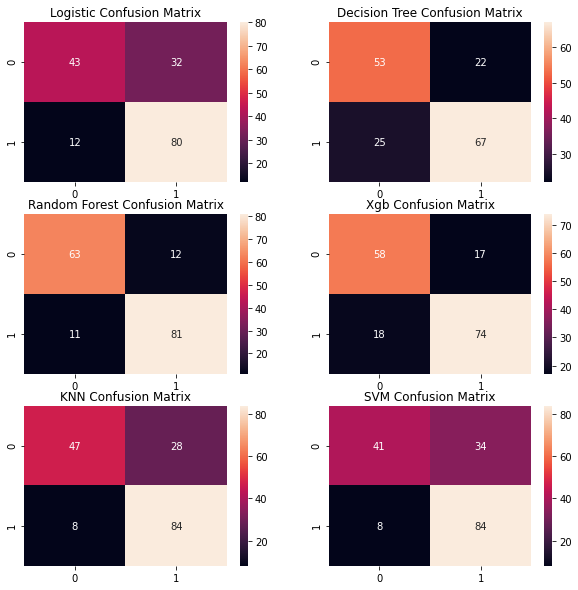

In [49]:
ml_algorthims(nd)